In [1]:
import os, scvi, torch, numpy as np, pandas as pd, seaborn as sns, scanpy as sc, matplotlib.pyplot as plt

In [2]:
sc.set_figure_params(figsize=(6, 2), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")

### PBMC8k

#### Train a scVI

In [3]:
adata = scvi.data.pbmc_dataset(save_path='../data/pbmc')
adata.layers["counts"] = adata.X.copy()
scvi.data.poisson_gene_selection(
    adata,
    n_top_genes=1000,
    batch_key="batch",
    subset=True,
    layer="counts",
)
scvi.model.SCVI.setup_anndata(
    adata,
    labels_key="str_labels",
    batch_key="batch",
    layer="counts",
)

INFO     File ../data/pbmc/gene_info_pbmc.csv already downloaded                                                   
INFO     File ../data/pbmc/pbmc_metadata.pickle already downloaded                                                 
INFO     File ../data/pbmc/pbmc8k/filtered_gene_bc_matrices.tar.gz already downloaded                              
INFO     Extracting tar file                                                                                       
INFO     Removing extracted data at ../data/pbmc/pbmc8k/filtered_gene_bc_matrices                                  
INFO     File ../data/pbmc/pbmc4k/filtered_gene_bc_matrices.tar.gz already downloaded                              
INFO     Extracting tar file                                                                                       
INFO     Removing extracted data at ../data/pbmc/pbmc4k/filtered_gene_bc_matrices                                  


/home/wangh256/anaconda3/envs/GeneCBM/lib/python3.9/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


Sampling from binomial...: 100%|██████████| 10000/10000 [00:00<00:00, 26878.41it/s]


In [4]:
# scvi_pbmc = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")
# scvi_pbmc = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="zinb")
scvi_pbmc = scvi.model.SCVI(adata, n_layers=2, n_hidden=2048, n_latent=1024, gene_likelihood="zinb")
# scvi_pbmc = scvi.model.SCVI(adata, n_layers=2, n_hidden=2048, n_latent=1024, gene_likelihood="nb")

In [5]:
scvi_pbmc.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 400/400: 100%|██████████| 400/400 [04:18<00:00,  1.55it/s, v_num=1, train_loss_step=641, train_loss_epoch=669]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [04:18<00:00,  1.54it/s, v_num=1, train_loss_step=641, train_loss_epoch=669]


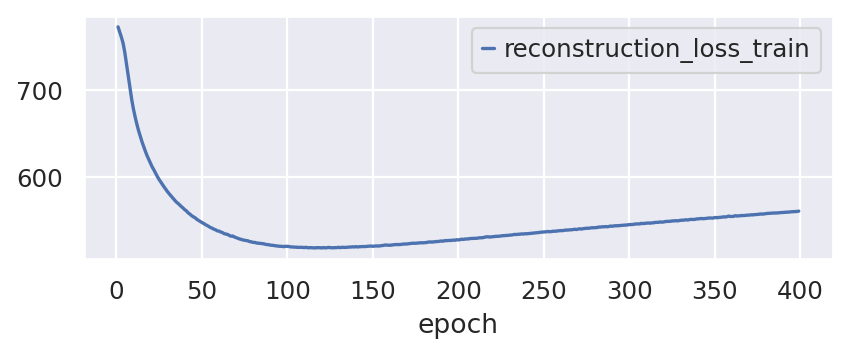

In [6]:
train_l2 = scvi_pbmc.history["reconstruction_loss_train"][1:]
ax = train_l2.plot()

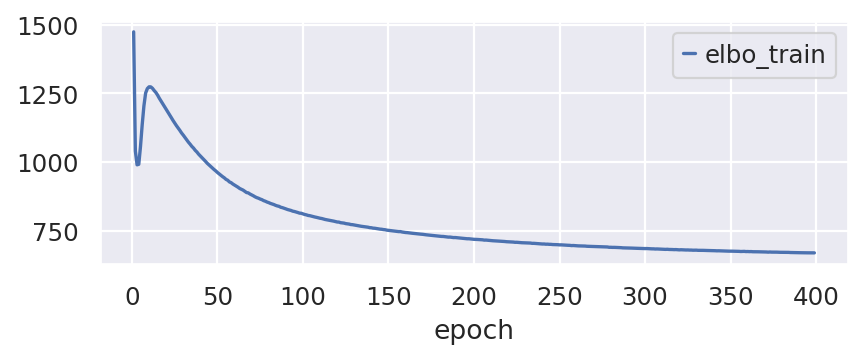

In [7]:
train_l2 = scvi_pbmc.history["elbo_train"][1:]
ax = train_l2.plot()

#### check reconstruction error on raw counts

In [9]:
_df = scvi_pbmc.get_normalized_expression()  # p_x
_df

,ENSG00000188976,ENSG00000187608,ENSG00000157873,ENSG00000171735,ENSG00000116288,ENSG00000116649,ENSG00000028137,ENSG00000142634,ENSG00000157191,ENSG00000158825,...,ENSG00000243646,ENSG00000142166,ENSG00000159128,ENSG00000142188,ENSG00000205758,ENSG00000183486,ENSG00000160201,ENSG00000160213,ENSG00000183255,ENSG00000160255
AAACCTGAGCTAGTGG-1,0.000823,0.003865,0.000218,0.002126,0.002557,0.000307,0.000148,0.000499,0.000622,5.687471e-06,...,0.000054,0.001217,0.000149,0.000122,0.000012,0.000419,0.000490,0.001146,0.000004,0.001883
AAACCTGCACATTAGC-1,0.000450,0.000146,0.000571,0.002162,0.002506,0.000445,0.000150,0.000006,0.000817,8.050461e-06,...,0.000245,0.000026,0.000300,0.000204,0.000539,0.000165,0.000749,0.001082,0.000369,0.001481
AAACCTGCACTGTTAG-1,0.000033,0.000369,0.000078,0.000668,0.001157,0.000185,0.001400,0.001164,0.000419,9.166758e-04,...,0.001562,0.000026,0.001847,0.000236,0.000090,0.000063,0.000182,0.000879,0.000096,0.002536
AAACCTGCATAGTAAG-1,0.001204,0.000070,0.000266,0.001784,0.001982,0.000211,0.000821,0.003947,0.000011,4.247664e-04,...,0.000040,0.000596,0.000083,0.000163,0.000076,0.000018,0.000489,0.001605,0.000050,0.003475
AAACCTGCATGAACCT-1,0.000301,0.000194,0.000491,0.000054,0.000924,0.000102,0.000873,0.005374,0.000216,1.139858e-06,...,0.000037,0.000016,0.000105,0.000142,0.000548,0.000784,0.000072,0.001588,0.000008,0.004990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCGCTAGCG-1,0.000172,0.000809,0.002294,0.001811,0.002195,0.000344,0.001171,0.001023,0.000999,1.638477e-04,...,0.000344,0.000192,0.000192,0.000031,0.000029,0.000217,0.000363,0.005878,0.000116,0.004612
TTTGTCACACTTAACG-1,0.000929,0.001364,0.000118,0.000101,0.003104,0.000253,0.000070,0.000641,0.000285,7.046513e-07,...,0.000059,0.000093,0.000045,0.000017,0.000024,0.000077,0.000167,0.000453,0.000041,0.003307
TTTGTCACAGGTCCAC-1,0.003237,0.001425,0.000490,0.000049,0.001701,0.000438,0.000040,0.001179,0.000185,4.424269e-06,...,0.000019,0.000202,0.000005,0.000145,0.000080,0.000074,0.000152,0.002542,0.000853,0.002794
TTTGTCAGTTAAGACA-1,0.000237,0.002393,0.001226,0.000102,0.001585,0.000944,0.000491,0.000060,0.000925,3.007970e-06,...,0.000137,0.000549,0.000928,0.000502,0.000502,0.000058,0.000026,0.000401,0.000039,0.000672


In [10]:
_df.sum(axis=1)

AAACCTGAGCTAGTGG-1    1.0
AAACCTGCACATTAGC-1    1.0
AAACCTGCACTGTTAG-1    1.0
AAACCTGCATAGTAAG-1    1.0
AAACCTGCATGAACCT-1    1.0
                     ... 
TTTGGTTTCGCTAGCG-1    1.0
TTTGTCACACTTAACG-1    1.0
TTTGTCACAGGTCCAC-1    1.0
TTTGTCAGTTAAGACA-1    1.0
TTTGTCATCCCAAGAT-1    1.0
Length: 11990, dtype: float32

In [11]:
_df_origin = pd.DataFrame(adata.X.toarray(), columns=_df.columns, index=_df.index)
_df_origin

,ENSG00000188976,ENSG00000187608,ENSG00000157873,ENSG00000171735,ENSG00000116288,ENSG00000116649,ENSG00000028137,ENSG00000142634,ENSG00000157191,ENSG00000158825,...,ENSG00000243646,ENSG00000142166,ENSG00000159128,ENSG00000142188,ENSG00000205758,ENSG00000183486,ENSG00000160201,ENSG00000160213,ENSG00000183255,ENSG00000160255
AAACCTGAGCTAGTGG-1,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
AAACCTGCACATTAGC-1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AAACCTGCACTGTTAG-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
AAACCTGCATAGTAAG-1,1.0,0.0,0.0,1.0,2.0,0.0,1.0,4.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0
AAACCTGCATGAACCT-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCGCTAGCG-1,0.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0
TTTGTCACACTTAACG-1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TTTGTCACAGGTCCAC-1,2.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
TTTGTCAGTTAAGACA-1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [12]:
_df_origin.sum(axis=1)

AAACCTGAGCTAGTGG-1    472.0
AAACCTGCACATTAGC-1    241.0
AAACCTGCACTGTTAG-1    632.0
AAACCTGCATAGTAAG-1    732.0
AAACCTGCATGAACCT-1    452.0
                      ...  
TTTGGTTTCGCTAGCG-1    873.0
TTTGTCACACTTAACG-1    371.0
TTTGTCACAGGTCCAC-1    740.0
TTTGTCAGTTAAGACA-1    253.0
TTTGTCATCCCAAGAT-1    437.0
Length: 11990, dtype: float32

In [13]:
adata.obs["n_counts"]

AAACCTGAGCTAGTGG-1    4520.0
AAACCTGCACATTAGC-1    2788.0
AAACCTGCACTGTTAG-1    4667.0
AAACCTGCATAGTAAG-1    4440.0
AAACCTGCATGAACCT-1    3224.0
                       ...  
TTTGGTTTCGCTAGCG-1    6514.0
TTTGTCACACTTAACG-1    3293.0
TTTGTCACAGGTCCAC-1    8322.0
TTTGTCAGTTAAGACA-1    2933.0
TTTGTCATCCCAAGAT-1    3322.0
Name: n_counts, Length: 11990, dtype: float32

In [14]:
_df_decoded = _df * _df_origin.sum(axis=1).values.reshape(-1, 1)
_df_decoded

,ENSG00000188976,ENSG00000187608,ENSG00000157873,ENSG00000171735,ENSG00000116288,ENSG00000116649,ENSG00000028137,ENSG00000142634,ENSG00000157191,ENSG00000158825,...,ENSG00000243646,ENSG00000142166,ENSG00000159128,ENSG00000142188,ENSG00000205758,ENSG00000183486,ENSG00000160201,ENSG00000160213,ENSG00000183255,ENSG00000160255
AAACCTGAGCTAGTGG-1,0.388394,1.824336,0.102984,1.003335,1.206712,0.144844,0.069962,0.235492,0.293553,0.002684,...,0.025512,0.574513,0.070164,0.057548,0.005466,0.197605,0.231084,0.540940,0.001916,0.888565
AAACCTGCACATTAGC-1,0.108442,0.035073,0.137691,0.521094,0.604030,0.107335,0.036078,0.001466,0.196885,0.001940,...,0.059104,0.006276,0.072266,0.049085,0.129892,0.039766,0.180432,0.260785,0.088882,0.356969
AAACCTGCACTGTTAG-1,0.021075,0.233149,0.049301,0.421992,0.731522,0.117138,0.885040,0.735651,0.264980,0.579339,...,0.987434,0.016192,1.167357,0.148875,0.056637,0.040032,0.114714,0.555746,0.060535,1.602641
AAACCTGCATAGTAAG-1,0.881639,0.051219,0.194642,1.305810,1.450764,0.154321,0.600893,2.889546,0.008389,0.310929,...,0.029039,0.435910,0.060407,0.119489,0.055544,0.012918,0.357681,1.174525,0.036478,2.543821
AAACCTGCATGAACCT-1,0.135987,0.087862,0.221879,0.024584,0.417525,0.046149,0.394788,2.429258,0.097622,0.000515,...,0.016924,0.007423,0.047422,0.064337,0.247713,0.354377,0.032671,0.717593,0.003686,2.255535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCGCTAGCG-1,0.150508,0.706117,2.003019,1.580675,1.916171,0.300370,1.022115,0.892822,0.872113,0.143039,...,0.300267,0.167358,0.167880,0.027263,0.025019,0.189208,0.316512,5.131887,0.101007,4.026521
TTTGTCACACTTAACG-1,0.344730,0.506207,0.043943,0.037576,1.151532,0.093746,0.025977,0.237836,0.105684,0.000261,...,0.021863,0.034598,0.016876,0.006336,0.008846,0.028575,0.061936,0.168051,0.015361,1.227021
TTTGTCACAGGTCCAC-1,2.395557,1.054783,0.362490,0.035965,1.258559,0.323821,0.029423,0.872748,0.136539,0.003274,...,0.014253,0.149587,0.003984,0.107036,0.059545,0.054844,0.112570,1.881169,0.631446,2.067400
TTTGTCAGTTAAGACA-1,0.059990,0.605311,0.310278,0.025803,0.401130,0.238905,0.124225,0.015175,0.234067,0.000761,...,0.034770,0.138979,0.234708,0.126975,0.126924,0.014690,0.006461,0.101569,0.009976,0.170121


In [15]:
_df_decoded.sum(axis=1)

AAACCTGAGCTAGTGG-1    472.000000
AAACCTGCACATTAGC-1    240.999985
AAACCTGCACTGTTAG-1    632.000000
AAACCTGCATAGTAAG-1    732.000000
AAACCTGCATGAACCT-1    452.000031
                         ...    
TTTGGTTTCGCTAGCG-1    872.999878
TTTGTCACACTTAACG-1    371.000031
TTTGTCACAGGTCCAC-1    739.999939
TTTGTCAGTTAAGACA-1    253.000000
TTTGTCATCCCAAGAT-1    437.000000
Length: 11990, dtype: float32

In [16]:
# sum per gene
(_df_origin - _df_decoded).sum(axis=1).mean()

-3.890707e-07

In [17]:
# sum per cell
(_df_origin - _df_decoded).sum(axis=0).mean()

-2.34375e-05

In [18]:
# sum per (cell, gene)
(_df_origin - _df_decoded).mean().mean()

-1.4305115e-09

#### Does it has good rank correlations?

In [19]:
_df_origin.corrwith(_df_decoded, axis=1)

AAACCTGAGCTAGTGG-1    0.866704
AAACCTGCACATTAGC-1    0.718734
AAACCTGCACTGTTAG-1    0.937232
AAACCTGCATAGTAAG-1    0.973409
AAACCTGCATGAACCT-1    0.868701
                        ...   
TTTGGTTTCGCTAGCG-1    0.959049
TTTGTCACACTTAACG-1    0.848206
TTTGTCACAGGTCCAC-1    0.804163
TTTGTCAGTTAAGACA-1    0.627672
TTTGTCATCCCAAGAT-1    0.907538
Length: 11990, dtype: float64

In [21]:
_df_origin.corrwith(_df_decoded, axis=1).mean()

0.8302899639120459

#### how about intersection of top {10, 100} highly expressed genes?

In [20]:
top10_columns_df1 = _df_decoded.apply(lambda row: row.nlargest(10).index, axis=1)
top10_columns_df2 = _df_origin.apply(lambda row: row.nlargest(10).index, axis=1)

In [22]:
intersections = top10_columns_df1.combine(top10_columns_df2, lambda a, b: a.intersection(b))
intersections_as_lists = intersections.apply(list)
percentages = intersections.apply(lambda x: len(x) / 10)

# Example to display the result
print("Intersections:\n", intersections_as_lists)
print("\nPercentages:\n", percentages)

Intersections:
 AAACCTGAGCTAGTGG-1    [ENSG00000227507, ENSG00000026025, ENSG0000019...
AAACCTGCACATTAGC-1    [ENSG00000227507, ENSG00000170315, ENSG0000016...
AAACCTGCACTGTTAG-1    [ENSG00000163220, ENSG00000196154, ENSG0000001...
AAACCTGCATAGTAAG-1    [ENSG00000163220, ENSG00000196154, ENSG0000010...
AAACCTGCATGAACCT-1    [ENSG00000105374, ENSG00000196154, ENSG0000016...
                                            ...                        
TTTGGTTTCGCTAGCG-1    [ENSG00000163220, ENSG00000101439, ENSG0000001...
TTTGTCACACTTAACG-1    [ENSG00000105374, ENSG00000196154, ENSG0000011...
TTTGTCACAGGTCCAC-1    [ENSG00000105374, ENSG00000111796, ENSG0000001...
TTTGTCAGTTAAGACA-1    [ENSG00000223865, ENSG00000105369, ENSG0000022...
TTTGTCATCCCAAGAT-1    [ENSG00000163220, ENSG00000101439, ENSG0000001...
Length: 11990, dtype: object

Percentages:
 AAACCTGAGCTAGTGG-1    0.6
AAACCTGCACATTAGC-1    0.6
AAACCTGCACTGTTAG-1    0.8
AAACCTGCATAGTAAG-1    0.8
AAACCTGCATGAACCT-1    0.7
                  

#### rank corr for each cell type

In [23]:
res_dict1, res_dict2 = {}, {}
for celltype in adata.obs["labels"].unique():
    indices = adata.obs["labels"] == celltype
    res_dict1[adata.obs["str_labels"][indices][0]] = _df_decoded.loc[indices].mean()
    res_dict2[adata.obs["str_labels"][indices][0]] = _df_origin.loc[indices].mean()

In [24]:
corr = {}
for celltype in res_dict1.keys():
    corr[celltype] = res_dict1[celltype].corr(res_dict2[celltype])
corr

{'CD4 T cells': 0.9946317658399629,
 'CD14+ Monocytes': 0.997533831598823,
 'CD8 T cells': 0.9943480471521944,
 'B cells': 0.9966109695659408,
 'Other': 0.9966624428968539,
 'Dendritic Cells': 0.9974754092133363,
 'FCGR3A+ Monocytes': 0.9974250934200646,
 'NK cells': 0.9955038595715318,
 'Megakaryocytes': 0.9947326651642273}